In [194]:
import pandas as pd
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [195]:
#Load the dataset and columns of interest
addataset = 'SocialNetworkAdClicks.csv'
df_addataset = pd.read_csv(addataset, usecols = ['User ID','Age','EstimatedSalary','GenderBinary','Purchased'])

In [196]:
#checking dataset for null values
df_addataset.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
GenderBinary       0
dtype: int64

In [197]:
#dataset descriptive statistics
df_addataset.describe()

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


In [198]:
#show the head of the dataset
df_addataset.head()

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [199]:
#identify which columns are our predictors and which is our target 
feature_cols= ['User ID', 'GenderBinary','Age','EstimatedSalary']
predictors = df_addataset[feature_cols]
target = df_addataset.Purchased

In [200]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.4)

In [201]:
#initiate logistic regression model
logreg = LogisticRegression()
#fit the model to the training data
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [202]:
#check accuracy and ROC score of the model
accuracy = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy))

Accuracy of the Logistic Regression Model: 78.125%


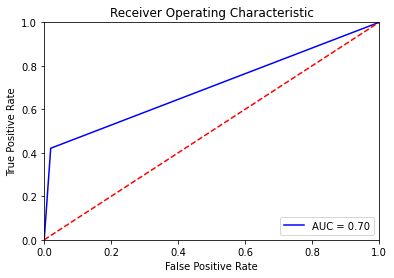

In [203]:
#create ROC Curve
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [204]:
# ROC Area Under the Curve
roc = metrics.roc_auc_score(y_test,y_pred)*100
print('Area Under the curve accuracy score is: {0}%'.format(roc))

Area Under the curve accuracy score is: 70.0817577925396%


In [205]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[101,   2],
       [ 33,  24]])

Text(0.5, 257.44, 'Predicted Class')

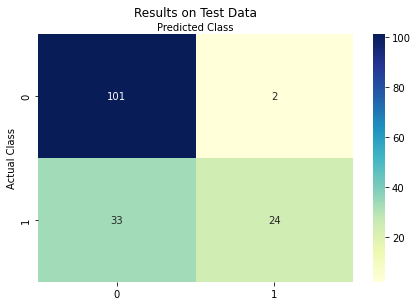

In [206]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')